## Feature Extraction Example

* Using Keras
* Using a pre-trained convolutional neural network - VGG16

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cosine

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

### Creating the model

```python
# Use weights pre-trained on ImageNet
weights='imagenet'

# Remove the final three fully-connected layers
include_top=False

# Applies global average pooling at the output of the last convolutional layer
pooling='avg'
```

In [2]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

You can also check the model's architecture (see the global average pooling at the end)

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Extracting features of an image

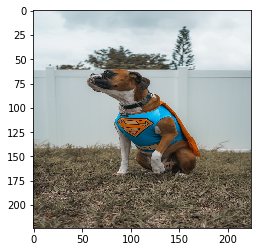

In [4]:
img = image.load_img('dog.jpeg', target_size=(224, 224))
plt.imshow(img)

The image must be prepared prior using the pre-trained model. Below, the following operations happen
* Transform image to array with the correct data type
* Create an extra dimension, since the network expact a batch as input
* Preprocess the input with respect to the statistics from ImageNet dataset

In [5]:
print(img)
x = image.img_to_array(img)
print(x.shape, x.dtype)
x = np.expand_dims(x, axis=0)
print(x.shape, x.dtype)
x = preprocess_input(x)
print(x.shape, x.dtype)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F0868386B90>
(224, 224, 3) float32
(1, 224, 224, 3) float32
(1, 224, 224, 3) float32


In [6]:
features = model.predict(x)
print(features.shape, features.dtype)

(1, 512) float32


## Extra

### Using features for comparison
The features computed by CNNs can be used for comparison. For example, we can compute features of one image and compared to the features of another image through a similarity measure.

In [7]:
def load_and_extract_features(model, img_path):
    # Loading in RGBA just to show correctly in the plot
    img = image.load_img(img_path, color_mode='rgba')
    plt.imshow(img)
    
    img = image.load_img(img_path, target_size=(224, 224))
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    
    return features

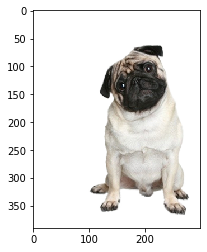

In [8]:
features_pug = load_and_extract_features(model, 'pug.png')

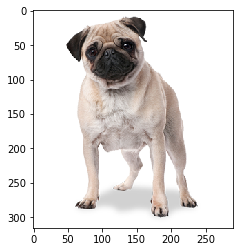

In [9]:
features_pug2 = load_and_extract_features(model, 'pug2.png')

### Computing distance between features

#### Superman dog vs pug 1

In [10]:
distance = cosine(features, features_pug)
print(distance)

0.4542124271392822


#### Superman dog vs pug 2

In [11]:
distance = cosine(features, features_pug2)
print(distance)

0.47432732582092285


#### Pug 1 vs pug 2

In [12]:
distance = cosine(features_pug, features_pug2)
print(distance)

0.1309639811515808


You can see the value is smaller between the two features vectors of the pug, which indicate these two images are similar to a given degree.